In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import albumentations as A
import cv2
import pandas as pd
import ntpath
import random

In [23]:
# !git clone https://github.com/rslim087a/track

In [24]:

datadir = './track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                                                             left  \
0  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                                                             right  \
0  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.649786  
1       0.0       0.0      0.0  0.627942  
2       0.0       0.0      0.0  0.622910  
3       0.0       0.0      0.0  0.619162  
4       0.0       0.0      0.0  0.615438

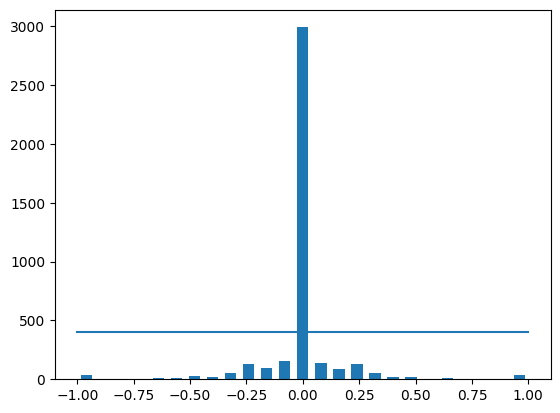

In [25]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [26]:
print('total data:', len(data))
print(data.shape)

total data: 4053
(4053, 7)


In [27]:

remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


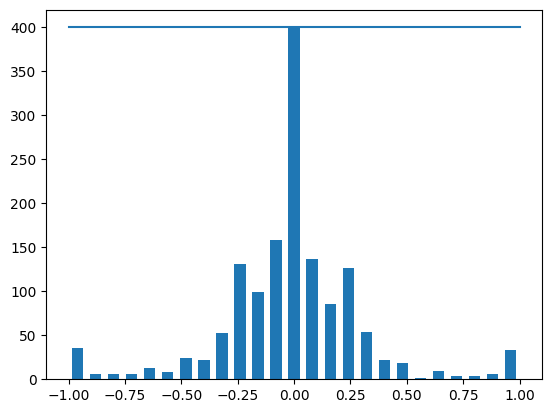

In [28]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [29]:

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [30]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)
image_paths,len(image_paths), steerings, len(steerings)

C:\Users\jayas\AppData\Local\Temp\ipykernel_11024\1523735822.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\jayas\AppData\Local\Temp\ipykernel_11024\1523735822.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\jayas\AppData\Local\Temp\ipykernel_11024\1523735822.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

(array(['D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\center_2018_07_16_17_11_44_342.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\left_2018_07_16_17_11_44_342.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\right_2018_07_16_17_11_44_342.jpg',
        ...,
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\center_2018_07_16_17_16_30_566.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\left_2018_07_16_17_16_30_566.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\right_2018_07_16_17_16_30_566.jpg'],
       shape=(4389,), dtype='<U112'),
 4389,
 array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15], shape=(4389,)),
 4389)

In [31]:
steerings

array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15], shape=(4389,))

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

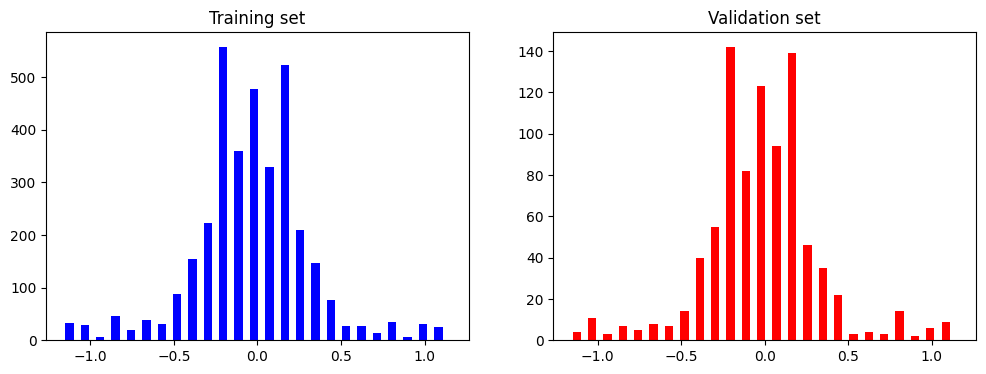

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

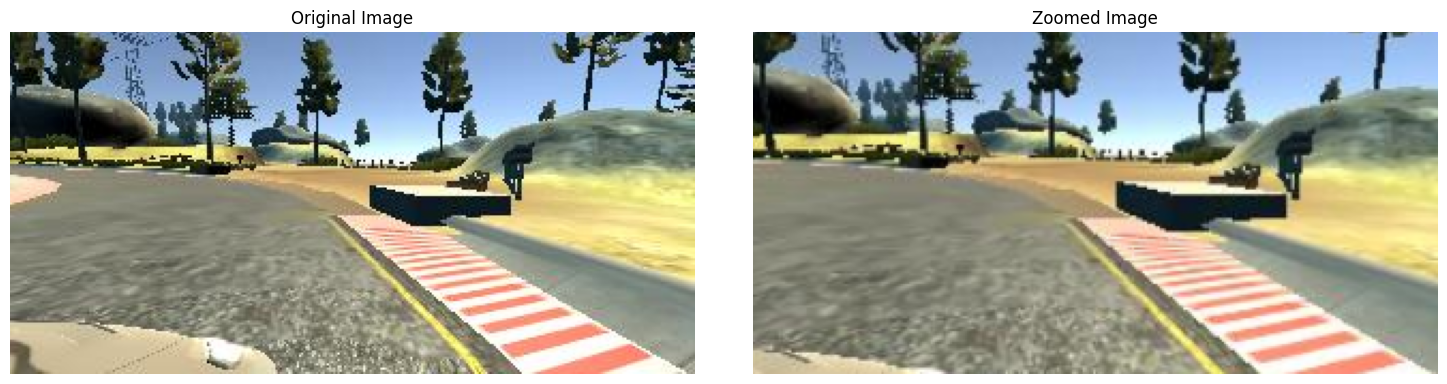

In [34]:
# Albumentations zoom transform
zoom_transform = A.Compose([
    A.Affine(scale=(1.0, 1.3), p=1.0)
])

def zoom(image):
    augmented = zoom_transform(image=image)
    return augmented["image"]


# Load random image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)

# Apply zoom
zoomed_image = zoom(original_image)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image")
axs[1].axis("off")

plt.show()

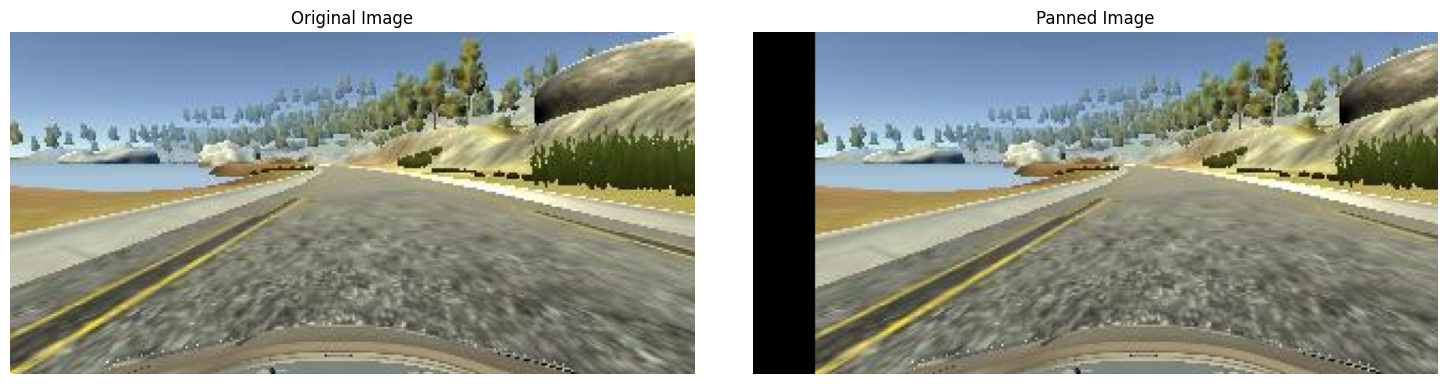

In [37]:
pan_transform = A.Compose([
    A.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        p=1.0
    )
])

def pan(image, steering_angle):
    tx = np.random.uniform(-0.1, 0.1)

    transform = A.Compose([
        A.Affine(translate_percent={"x": tx, "y": 0.0}, p=1.0)
    ])

    augmented = transform(image=image)
    image = augmented["image"]

    steering_angle += tx * 0.2

    return image, steering_angle



# Load random image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)

# Apply pan (dummy steering for visualization)
panned_image, _ = pan(original_image, 0.0)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")
axs[1].axis("off")

plt.show()

In [38]:
brightness_transform = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=0.4,   # roughly maps to 0.6–1.4 range
        contrast_limit=0.0,
        p=1.0
    )
])

def img_random_brightness(image):
    augmented = brightness_transform(image=image)
    return augmented["image"]

In [39]:
def img_random_flip(image, steering_angle):
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
        steering_angle = -steering_angle
    return image, steering_angle

In [40]:
def random_augment(image_path, steering_angle):
    image = mpimg.imread(image_path)

    # Pan (with correction)
    if np.random.rand() < 0.5:
        image, steering_angle = pan(image, steering_angle)

    # Zoom
    if np.random.rand() < 0.5:
        image = zoom(image)

    # Brightness
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)

    # Flip
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

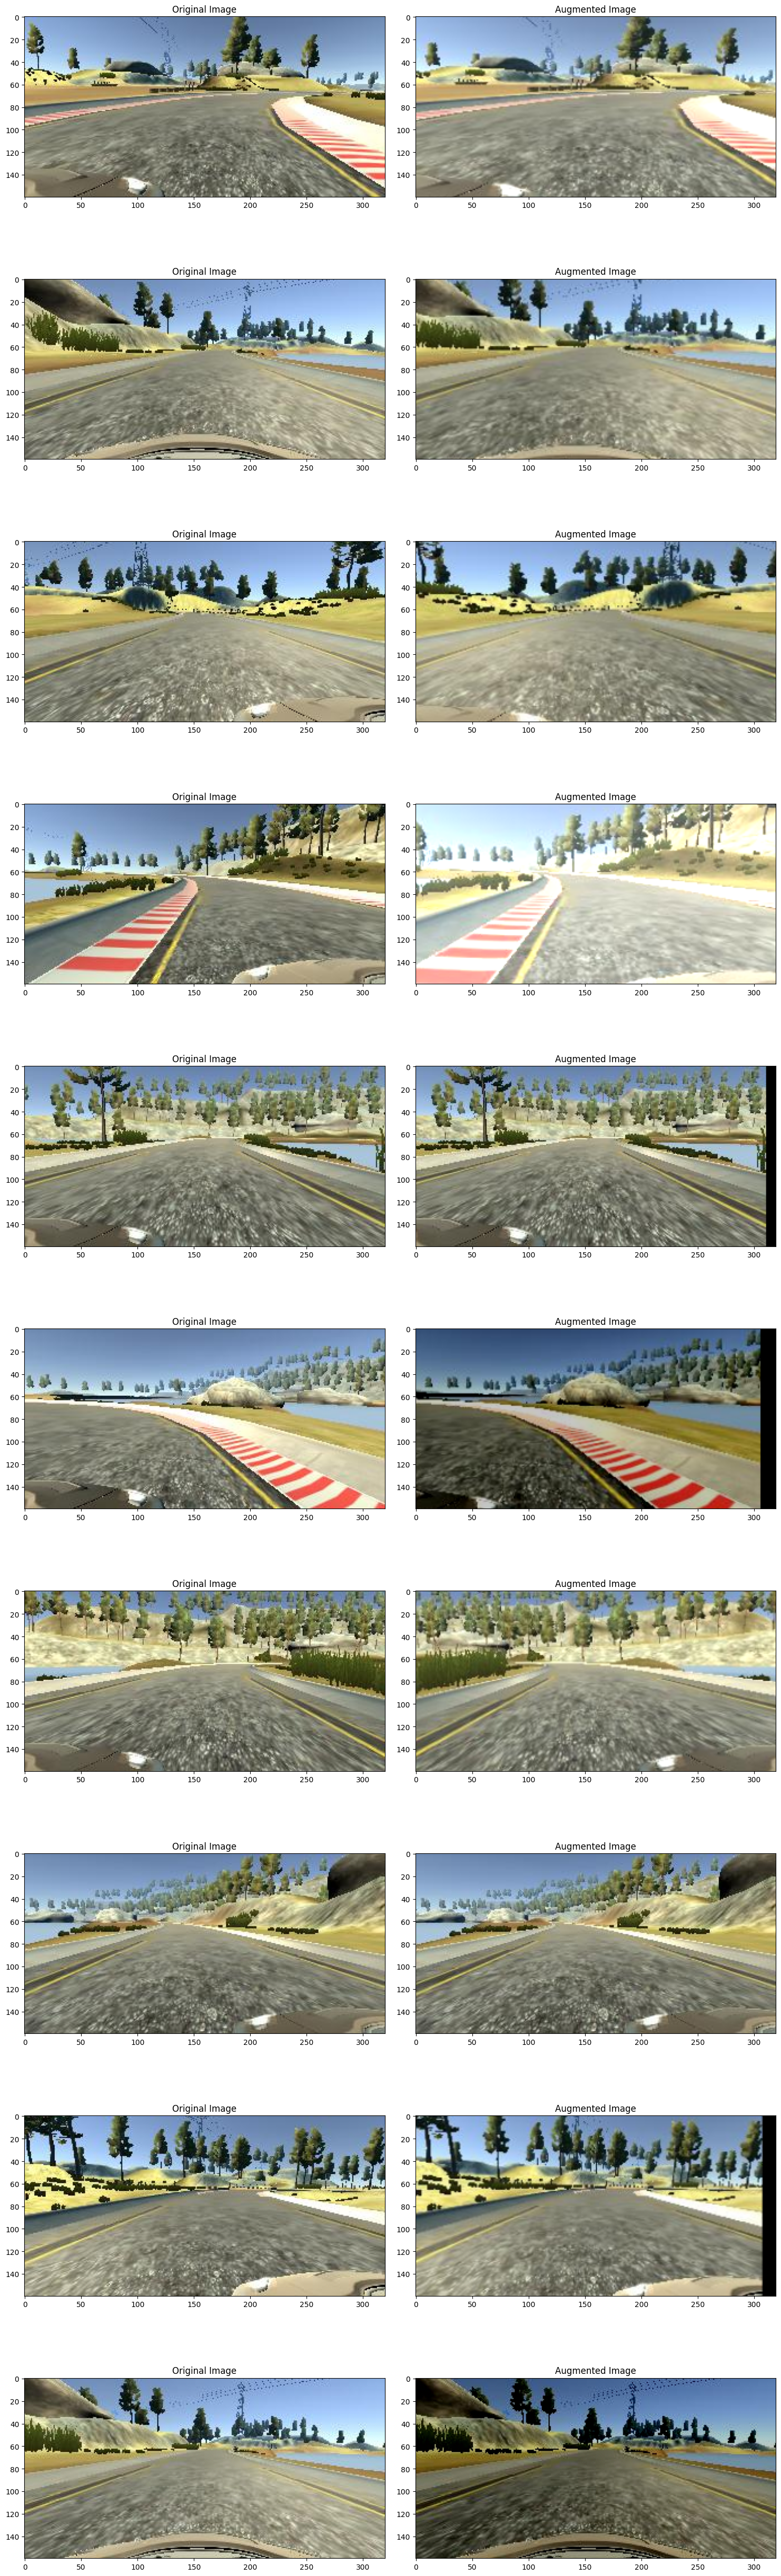

In [48]:

ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(nrow):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")